<a href="https://colab.research.google.com/github/sandesh20lamichhane/DeepLearning_Pytorch/blob/main/California_Housing_Price_PredictionANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 20/200, Loss: 1.0371
Epoch 40/200, Loss: 0.7055
Epoch 60/200, Loss: 0.5608
Epoch 80/200, Loss: 0.4741
Epoch 100/200, Loss: 0.4272
Epoch 120/200, Loss: 0.4016
Epoch 140/200, Loss: 0.3842
Epoch 160/200, Loss: 0.3727
Epoch 180/200, Loss: 0.3650
Epoch 200/200, Loss: 0.3589


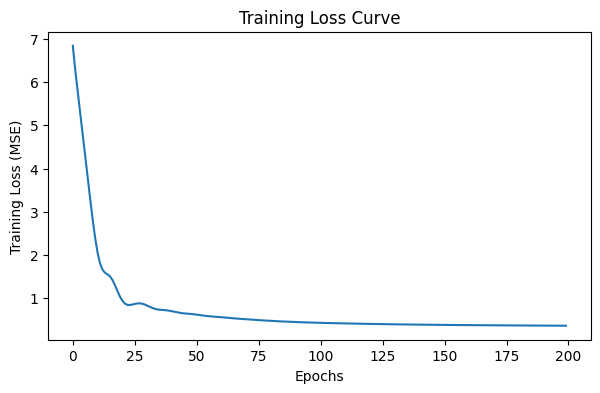

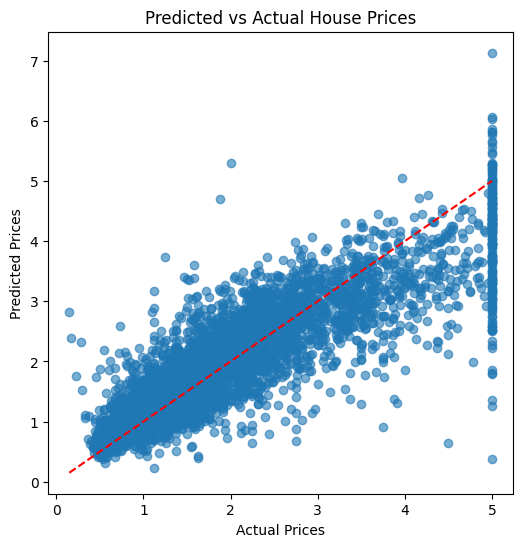

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize inputs
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define model
class HousingANN(nn.Module):
    def __init__(self):
        super(HousingANN, self).__init__()
        self.fc1 = nn.Linear(8, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = HousingANN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train model
losses = []
for epoch in range(200):
    model.train()
    preds = model(X_train)
    loss = criterion(preds, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}/200, Loss: {loss.item():.4f}")

# Evaluate model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

# Plot training loss
plt.figure(figsize=(7,4))
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Training Loss (MSE)")
plt.title("Training Loss Curve")
plt.show()

# Predicted vs Actual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.show()
